<a href="https://colab.research.google.com/github/andrewb1243/LSTM-Time-Series-Prediction-CCE/blob/main/LSTM_Vanilla_Car_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

file_location = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'

first_dataset = pd.read_csv(file_location)

first_dataset.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [ ]:
first_dataset['Month']=pd.to_datetime(first_dataset['Month'], infer_datetime_format = True)
first_dataset_indexed = first_dataset.set_index(['Month'])
first_dataset_indexed.head()

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


The statsmodel functions will allow us to seasonal decompose our data and view certain attributes such as the trend.

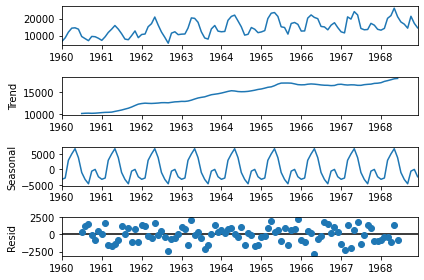

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompse_data = seasonal_decompose(first_dataset_indexed, model = "additive")
decompse_data.plot();

LSTMs are sensative to the scale of input data. It is good practice to rescale the data from 0 to 1 also called normalizing. We will normalzie this data with the Min Max scaler

<AxesSubplot:xlabel='Month'>

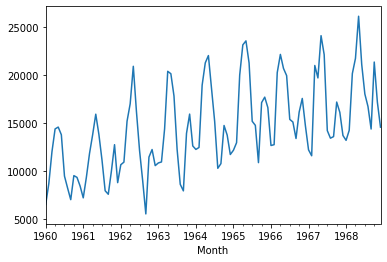

In [ ]:
throughput = first_dataset_indexed['Sales']
throughput.plot()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
first_dataset_scaled = scaler.fit_transform(first_dataset_indexed)
print(first_dataset_scaled)


[[0.04783011]
 [0.15391359]
 [0.31454873]
 [0.42993522]
 [0.43928693]
 [0.40051629]
 [0.19141786]
 [0.13068043]
 [0.07213482]
 [0.19370708]
 [0.18489114]
 [0.14066534]
 [0.08129171]
 [0.18537821]
 [0.30534314]
 [0.40017534]
 [0.50450538]
 [0.4019775 ]
 [0.2715406 ]
 [0.11723735]
 [0.09945935]
 [0.21659929]
 [0.35025084]
 [0.1581998 ]
 [0.24884321]
 [0.26199406]
 [0.46914422]
 [0.55730359]
 [0.74677317]
 [0.51809459]
 [0.32024743]
 [0.16701573]
 [0.        ]
 [0.28766256]
 [0.3257513 ]
 [0.24426477]
 [0.25785398]
 [0.26287078]
 [0.43042229]
 [0.72139691]
 [0.7091715 ]
 [0.5965613 ]
 [0.32633578]
 [0.14972481]
 [0.11660416]
 [0.40738396]
 [0.50499245]
 [0.34387024]
 [0.32628708]
 [0.33617457]
 [0.65150261]
 [0.76425893]
 [0.80108129]
 [0.63382203]
 [0.46792655]
 [0.23077298]
 [0.2544445 ]
 [0.44732356]
 [0.39871414]
 [0.30052116]
 [0.32209829]
 [0.36028445]
 [0.70244995]
 [0.85514588]
 [0.87540792]
 [0.76367444]
 [0.46860845]
 [0.44805416]
 [0.2594613 ]
 [0.56314841]
 [0.59076518]
 [0.53

In [ ]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(first_dataset_scaled, test_size = 0.10, shuffle = False)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator 

n_input = 6
n_features = 1

generatorTrain = TimeseriesGenerator(train, train, length=n_input, batch_size=1)
generatorTest = TimeseriesGenerator(test, test, length=n_input, batch_size=1)

In [ ]:
print(train)

            Sales
Month            
1960-01-01   6550
1960-02-01   8728
1960-03-01  12026
1960-04-01  14395
1960-05-01  14587
...           ...
1967-09-01  13598
1967-10-01  17187
1967-11-01  16119
1967-12-01  13713
1968-01-01  13210

[97 rows x 1 columns]


The next two snippits display the data with the time series prediction

In [ ]:
batch_0 = generatorTrain[0]
x ,y = batch_0
print(x,y)

KeyError: ignored

In [ ]:
#number of samples
print("Samples: %d" % len(generatorTrain))
#print each sample
for i in range(len(generatorTrain)):
  x, y = generatorTrain[i]
  print('%s => %s' % (x , y))

Samples: 91
[[[0.04783011]
  [0.15391359]
  [0.31454873]
  [0.42993522]
  [0.43928693]
  [0.40051629]]] => [[0.19141786]]
[[[0.15391359]
  [0.31454873]
  [0.42993522]
  [0.43928693]
  [0.40051629]
  [0.19141786]]] => [[0.13068043]]
[[[0.31454873]
  [0.42993522]
  [0.43928693]
  [0.40051629]
  [0.19141786]
  [0.13068043]]] => [[0.07213482]]
[[[0.42993522]
  [0.43928693]
  [0.40051629]
  [0.19141786]
  [0.13068043]
  [0.07213482]]] => [[0.19370708]]
[[[0.43928693]
  [0.40051629]
  [0.19141786]
  [0.13068043]
  [0.07213482]
  [0.19370708]]] => [[0.18489114]]
[[[0.40051629]
  [0.19141786]
  [0.13068043]
  [0.07213482]
  [0.19370708]
  [0.18489114]]] => [[0.14066534]]
[[[0.19141786]
  [0.13068043]
  [0.07213482]
  [0.19370708]
  [0.18489114]
  [0.14066534]]] => [[0.08129171]]
[[[0.13068043]
  [0.07213482]
  [0.19370708]
  [0.18489114]
  [0.14066534]
  [0.08129171]]] => [[0.18537821]]
[[[0.07213482]
  [0.19370708]
  [0.18489114]
  [0.14066534]
  [0.08129171]
  [0.18537821]]] => [[0.30534314]

Vanilla LSTM 

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM 

In [ ]:

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(300, activation = 'tanh',input_shape=(n_input, n_features)))
model.add(Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 300)               362400    
                                                                 
 dense_2 (Dense)             (None, 1)                 301       
                                                                 
Total params: 362,701
Trainable params: 362,701
Non-trainable params: 0
_________________________________________________________________


Training the Model

In [ ]:
model.compile(optimizer='adam',loss='mse')
model.fit(generatorTrain, epochs=30, batch_size=15, shuffle=False)


Epoch 1/30
91/91 [==============================] - 3s 10ms/step - loss: 0.0010
Epoch 2/30
91/91 [==============================] - 1s 8ms/step - loss: 5.9335e-04
Epoch 3/30
91/91 [==============================] - 1s 9ms/step - loss: 5.0364e-04
Epoch 4/30
91/91 [==============================] - 1s 9ms/step - loss: 0.0015
Epoch 5/30
91/91 [==============================] - 1s 12ms/step - loss: 0.0012
Epoch 6/30
91/91 [==============================] - 1s 14ms/step - loss: 0.0011
Epoch 7/30
91/91 [==============================] - 1s 9ms/step - loss: 0.0012
Epoch 8/30
91/91 [==============================] - 1s 9ms/step - loss: 6.4030e-04
Epoch 9/30
91/91 [==============================] - 1s 9ms/step - loss: 3.5696e-04
Epoch 10/30
91/91 [==============================] - 1s 10ms/step - loss: 2.1648e-04
Epoch 11/30
91/91 [==============================] - 1s 9ms/step - loss: 2.3996e-04
Epoch 12/30
91/91 [==============================] - 1s 10ms/step - loss: 5.4874e-04
Epoch 13/30
91/9

In [ ]:
import numpy as np

predictions = []

first_batch = train[-n_input:]
current_batch = first_batch.reshape((1, n_input, n_features))
print(current_batch)

for i in range(len(test)):
  #get the prediction value for first
  current_pred = model.predict(current_batch)[0]

  #append the prediction into array
  predictions.append(current_pred)

  #remove the first value
  current_batch_rmv_frist = current_batch[:,1:,:]
  #update the batch
  current_batch = np.append(current_batch_rmv_frist,[[current_pred]],axis=1)

print([i[0] for i in predictions])


[[[0.38312795]
  [0.39111587]
  [0.5659247 ]
  [0.5139058 ]
  [0.39671716]
  [0.37221762]]]
1/1 [==============================] - 0s 20ms/step
[0.32801548, 0.5644157, 0.5583687, 0.56149256, 0.40893194, 0.32719404, 0.3955575, 0.5160878, 0.4443581, 0.366288, 0.36274642]


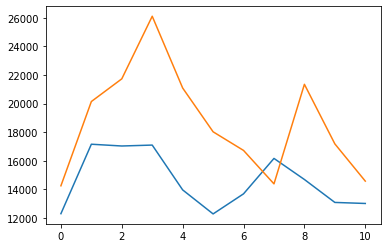

In [ ]:
import matplotlib.pyplot as plt

predictions_actual_size = scaler.inverse_transform(predictions)
test_data_actual_scale = scaler.inverse_transform(test)

plt.plot(predictions_actual_size)
plt.plot(test_data_actual_scale)

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error

mean_squared_error(test,predictions)

0.059347196333027735

In [ ]:
import pickle

#save
with open('VanillaEpoch300.pkl','wb') as f:
  pickle.dump(model,f)